In [2]:
import numpy as np
import csv
import glob, copy, os, random, time
import pandas as pd
import datetime
import matplotlib.pyplot as plt



In [4]:
filename = './VO2max-6-HSY.csv' #파일경로 여기에 
rawdata = pd.read_csv(filename)
rawdata.head()

,ID1,Unnamed: 1,Unnamed: 2,테스트 날짜,2023-02-14,Unnamed: 5,대기압 (mmHg),766,Unnamed: 8,t,...,mark Speed,mark Dist.,Phase time,VO2/Kg%Pred,BR,VT/Ti,HRR,PaCO2_e,SV,CO
0,성,KIST 연구,NaN,테스트 시간,오후 8:03:11,NaN,대기 온도 (°C),24,NaN,s,...,m/s,m,hh:mm:ss,%,%,---,bpm,mmHg,mL,L/min
1,이름,.,NaN,# steps,315,NaN,대기 상대 습도 (%),36,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,성별,여성,NaN,Duration,00:14:09,NaN,플로우미터 온도 (°C),34,NaN,00:00:01,...,0,0,00:00:00,25,85.2,0.87,81,35,27.7,3
3,나이,32,NaN,BSA (m2),1.87359942400869,NaN,플로우미터 상대 습도 (%),100,NaN,00:00:04,...,0,0,00:00:03,18,88.7,0.74,84,35,25.7,2.7
4,키 (cm),174,NaN,BMI (kg/m2),24.1,NaN,STPD (---),0.8331,NaN,00:00:07,...,0,0,00:00:06,16,89.6,0.7,85,34,25,2.6


In [27]:
data = rawdata.iloc[2:,9:]
data =data.reset_index()

data = data.iloc[:,1:]
data.head()

,t,Rf,VT,VE,IV,VO2,VCO2,RQ,O2exp,CO2exp,...,mark Speed,mark Dist.,Phase time,VO2/Kg%Pred,BR,VT/Ti,HRR,PaCO2_e,SV,CO
0,00:00:01,22.56,0.952,21.474,715,653.5216512,553.3832564,0.85,163.2,30.5,...,0,0,00:00:00,25,85.2,0.87,81,35,27.7,3
1,00:00:04,21.18,0.775,16.412,724,459.656729,389.9512294,0.85,134.8,22.9333333,...,0,0,00:00:03,18,88.7,0.74,84,35,25.7,2.7
2,00:00:07,20.39,0.738,15.037,719,410.73433,348.7394099,0.85,128.7,21.3,...,0,0,00:00:06,16,89.6,0.7,85,34,25,2.6
3,00:00:10,20.59,0.75,15.446,680,425.309015,361.8341091,0.85,130.5,21.8666667,...,0,0,00:00:09,17,89.3,0.7,85,34,25.3,2.6
4,00:00:13,17.16,1.227,21.06,1111,578.4720769,528.2895042,0.91,212.9666667,38.2666667,...,0,0,00:00:12,23,85.5,0.92,84,34,27.6,2.9


In [34]:
data_meta1 = rawdata.iloc[:7, :2]
# print(data_meta1)

data_meta1 = data_meta1.set_index('ID1').T.reset_index(drop=True)

print(data_meta1)
data_meta1.head()

ID1        성 이름  성별  나이 키 (cm) 체중 (kg)        생년월일
0    KIST 연구  .  여성  32    174      73  1990-12-24


ID1,성,이름,성별,나이,키 (cm),체중 (kg),생년월일
0,KIST 연구,.,여성,32,174,73,1990-12-24


In [36]:

rawdata_noheader = pd.read_csv(filename, header=None)
rawdata_noheader.head()

# data_meta2 = rawdata.iloc[:6, 3:5]
# print(data_meta2)



,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,ID1,Unnamed: 1,Unnamed: 2,테스트 날짜,2023-02-14,Unnamed: 5,대기압 (mmHg),766,Unnamed: 8,t,...,mark Speed,mark Dist.,Phase time,VO2/Kg%Pred,BR,VT/Ti,HRR,PaCO2_e,SV,CO
1,성,KIST 연구,NaN,테스트 시간,오후 8:03:11,NaN,대기 온도 (°C),24,NaN,s,...,m/s,m,hh:mm:ss,%,%,---,bpm,mmHg,mL,L/min
2,이름,.,NaN,# steps,315,NaN,대기 상대 습도 (%),36,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,성별,여성,NaN,Duration,00:14:09,NaN,플로우미터 온도 (°C),34,NaN,00:00:01,...,0,0,00:00:00,25,85.2,0.87,81,35,27.7,3
4,나이,32,NaN,BSA (m2),1.87359942400869,NaN,플로우미터 상대 습도 (%),100,NaN,00:00:04,...,0,0,00:00:03,18,88.7,0.74,84,35,25.7,2.7


In [41]:
data_meta2 = rawdata_noheader.iloc[:6, 3:5]

data_meta2 = data_meta2.set_index(3).T.reset_index(drop=True)
data_meta2.head()

3,테스트 날짜,테스트 시간,# steps,Duration,BSA (m2),BMI (kg/m2)
0,2023-02-14,오후 8:03:11,315,00:14:09,1.87359942400869,24.1


In [43]:
data_meta3 = rawdata_noheader.iloc[:11, 6:8]

data_meta3 = data_meta3.set_index(6).T.reset_index(drop=True)
data_meta3.head()

6,대기압 (mmHg),대기 온도 (°C),대기 상대 습도 (%),플로우미터 온도 (°C),플로우미터 상대 습도 (%),STPD (---),BTPS Ins (---),BTPS Exp (---),User 1 (---),User 2 (---),User 3 (---)
0,766,24,36,34,100,0.8331,1.1003,1.0197,-,-,-


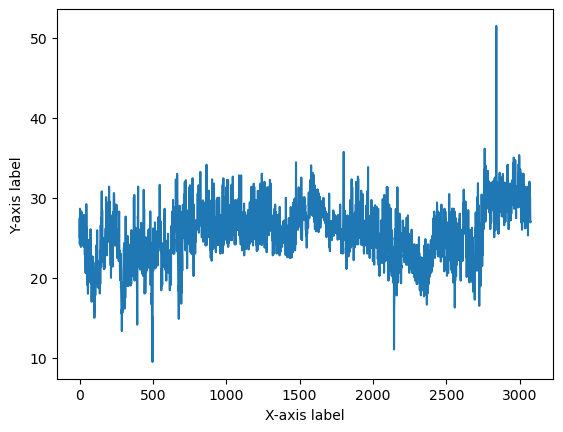

In [19]:
plt.plot(data_amplitude.iloc[:, 0])
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.show()

In [46]:
data_meta = pd.concat([data_meta1, data_meta2, data_meta3], axis=1)
data_meta.head()

,성,이름,성별,나이,키 (cm),체중 (kg),생년월일,테스트 날짜,테스트 시간,# steps,...,대기 온도 (°C),대기 상대 습도 (%),플로우미터 온도 (°C),플로우미터 상대 습도 (%),STPD (---),BTPS Ins (---),BTPS Exp (---),User 1 (---),User 2 (---),User 3 (---)
0,KIST 연구,.,여성,32,174,73,1990-12-24,2023-02-14,오후 8:03:11,315,...,24,36,34,100,0.8331,1.1003,1.0197,-,-,-


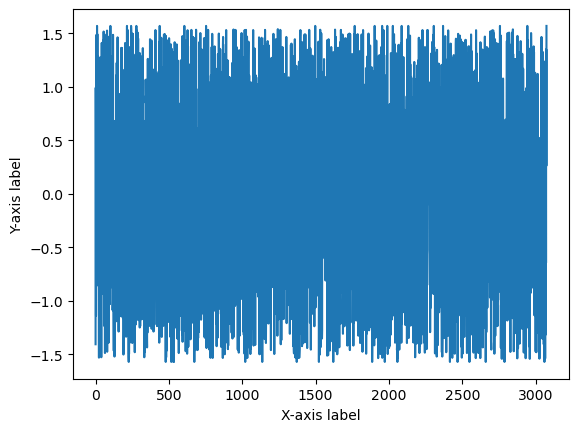

In [22]:
# -------------------
#  data_meta, data ==> two dataframes

In [24]:
data_others = data.iloc[:,102:]
data_others.head()

,102,103,104,105,106,107,108,109,110
0,9243780.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,14551.0
1,9283767.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,44531.0
2,9312986.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,68516.0
3,9323736.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,92502.0
4,9324130.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,105493.0


In [57]:
import datetime

for i in range(len(data)):
    year = data[104][i]
#     print(year)
    month = data[105][i]
#     print(month)
    day = data[106][i]
    hour = data[107][i]
    minute = data[108][i]
    second = data[109][i]
    microsecond = data[110][i]
    data['timestamp'] =  datetime.datetime(int(year), int(month), int(day), int(hour), int(minute), int(second), int(microsecond))



data.head()


,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,timestamp
0,24.331050,24.331050,22.360680,23.537205,22.803509,21.840330,20.880613,19.924859,18.973666,18.027756,...,9243780.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,14551.0,2023-02-14 19:44:39.093481
1,27.459060,26.627054,27.459060,26.076810,24.186773,22.825424,22.360680,23.259407,22.360680,21.470911,...,9283767.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,44531.0,2023-02-14 19:44:39.093481
2,25.000000,25.298221,23.409400,23.409400,22.472205,20.615528,20.615528,21.023796,20.124612,19.723083,...,9312986.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,68516.0,2023-02-14 19:44:39.093481
3,28.635642,28.178006,26.832816,26.419690,25.059928,24.186773,23.323808,22.472205,21.633308,20.808652,...,9323736.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,92502.0,2023-02-14 19:44:39.093481
4,25.961510,24.738634,24.515301,23.537205,22.561028,21.377558,21.377558,21.095023,20.099751,20.000000,...,9324130.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,105493.0,2023-02-14 19:44:39.093481


In [59]:
columns_amplitude = ['sub'+str(i+1) for i in range(51)]
columns_phase = ['phase' + str(i+1) for i in range(51,102)]
columns_103 = ['103']
columns_tag = ['tag']
columns_timestamp = ['YYYY','MM', 'DD', 'hh','mm','ss','ms','timestamp']

In [60]:
data.columns = columns_amplitude + columns_phase + columns_103+ columns_tag + columns_timestamp

In [61]:
data.head()

,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,...,103,tag,YYYY,MM,DD,hh,mm,ss,ms,timestamp
0,24.331050,24.331050,22.360680,23.537205,22.803509,21.840330,20.880613,19.924859,18.973666,18.027756,...,9243780.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,14551.0,2023-02-14 19:44:39.093481
1,27.459060,26.627054,27.459060,26.076810,24.186773,22.825424,22.360680,23.259407,22.360680,21.470911,...,9283767.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,44531.0,2023-02-14 19:44:39.093481
2,25.000000,25.298221,23.409400,23.409400,22.472205,20.615528,20.615528,21.023796,20.124612,19.723083,...,9312986.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,68516.0,2023-02-14 19:44:39.093481
3,28.635642,28.178006,26.832816,26.419690,25.059928,24.186773,23.323808,22.472205,21.633308,20.808652,...,9323736.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,92502.0,2023-02-14 19:44:39.093481
4,25.961510,24.738634,24.515301,23.537205,22.561028,21.377558,21.377558,21.095023,20.099751,20.000000,...,9324130.0,0.0,2023.0,2.0,14.0,19.0,43.0,45.0,105493.0,2023-02-14 19:44:39.093481


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
           dtype='int64', length=111)

In [ ]:
import datetime

my_list = [2023.0, 2.0, 14.0, 19.0, 43.0, 45.0, 14551.0]

my_timestamp = datetime.datetime(int(my_list[0]), int(my_list[1]), int(my_list[2]), int(my_list[3]), int(my_list[4]), int(my_list[5]), int(my_list[6]))

print(my_timestamp)
